<a href="https://colab.research.google.com/github/ravivarmateppala/-test-of-Machine-Learning-Theoretical-Concepts/blob/main/hyper%20tuning%20decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv(r"/content/heart_v2.csv")

In [ ]:
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
data.shape

(270, 5)

In [ ]:
data.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

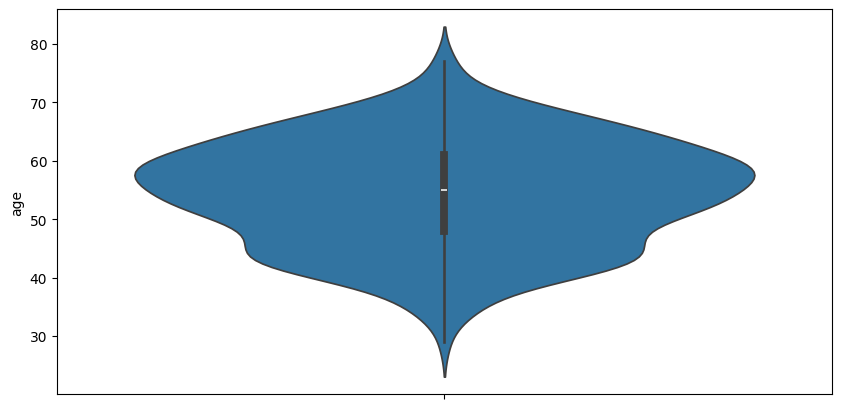

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['age'])
plt.show()

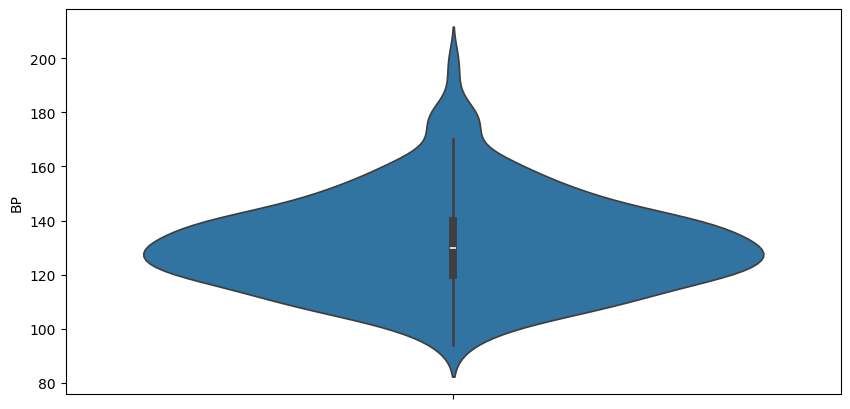

In [ ]:
plt.figure(figsize = (10,5))
ax= sns.violinplot(data['BP'])
plt.show()

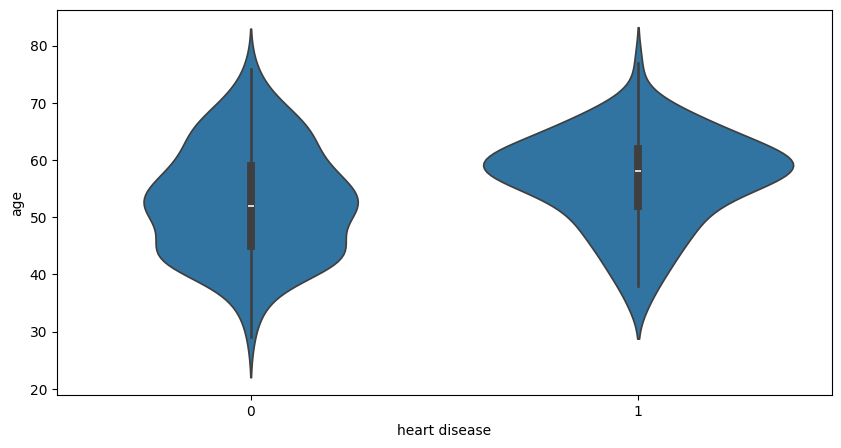

In [ ]:
plt.figure(figsize = (10,5))
sns.violinplot(y = 'age', x = 'heart disease', data = data)
plt.show()

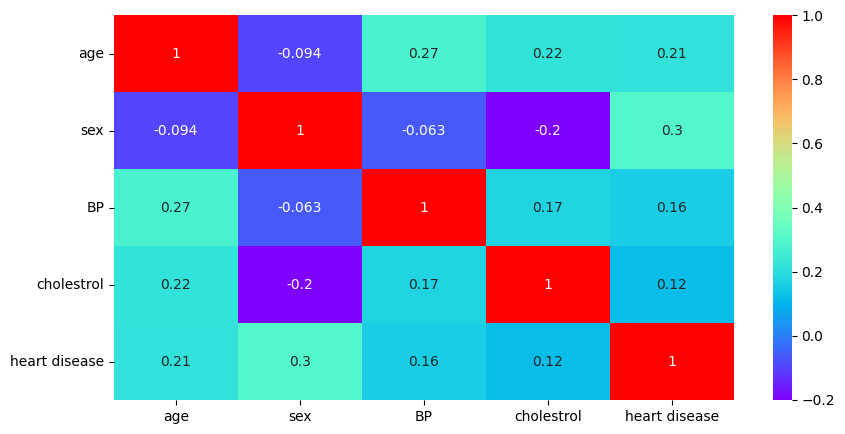

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [ ]:
data.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [ ]:
X = data.drop('heart disease',axis=1)

# Putting response variable to y
y = data['heart disease']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=50)
X_train.shape, X_test.shape

((162, 4), (108, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

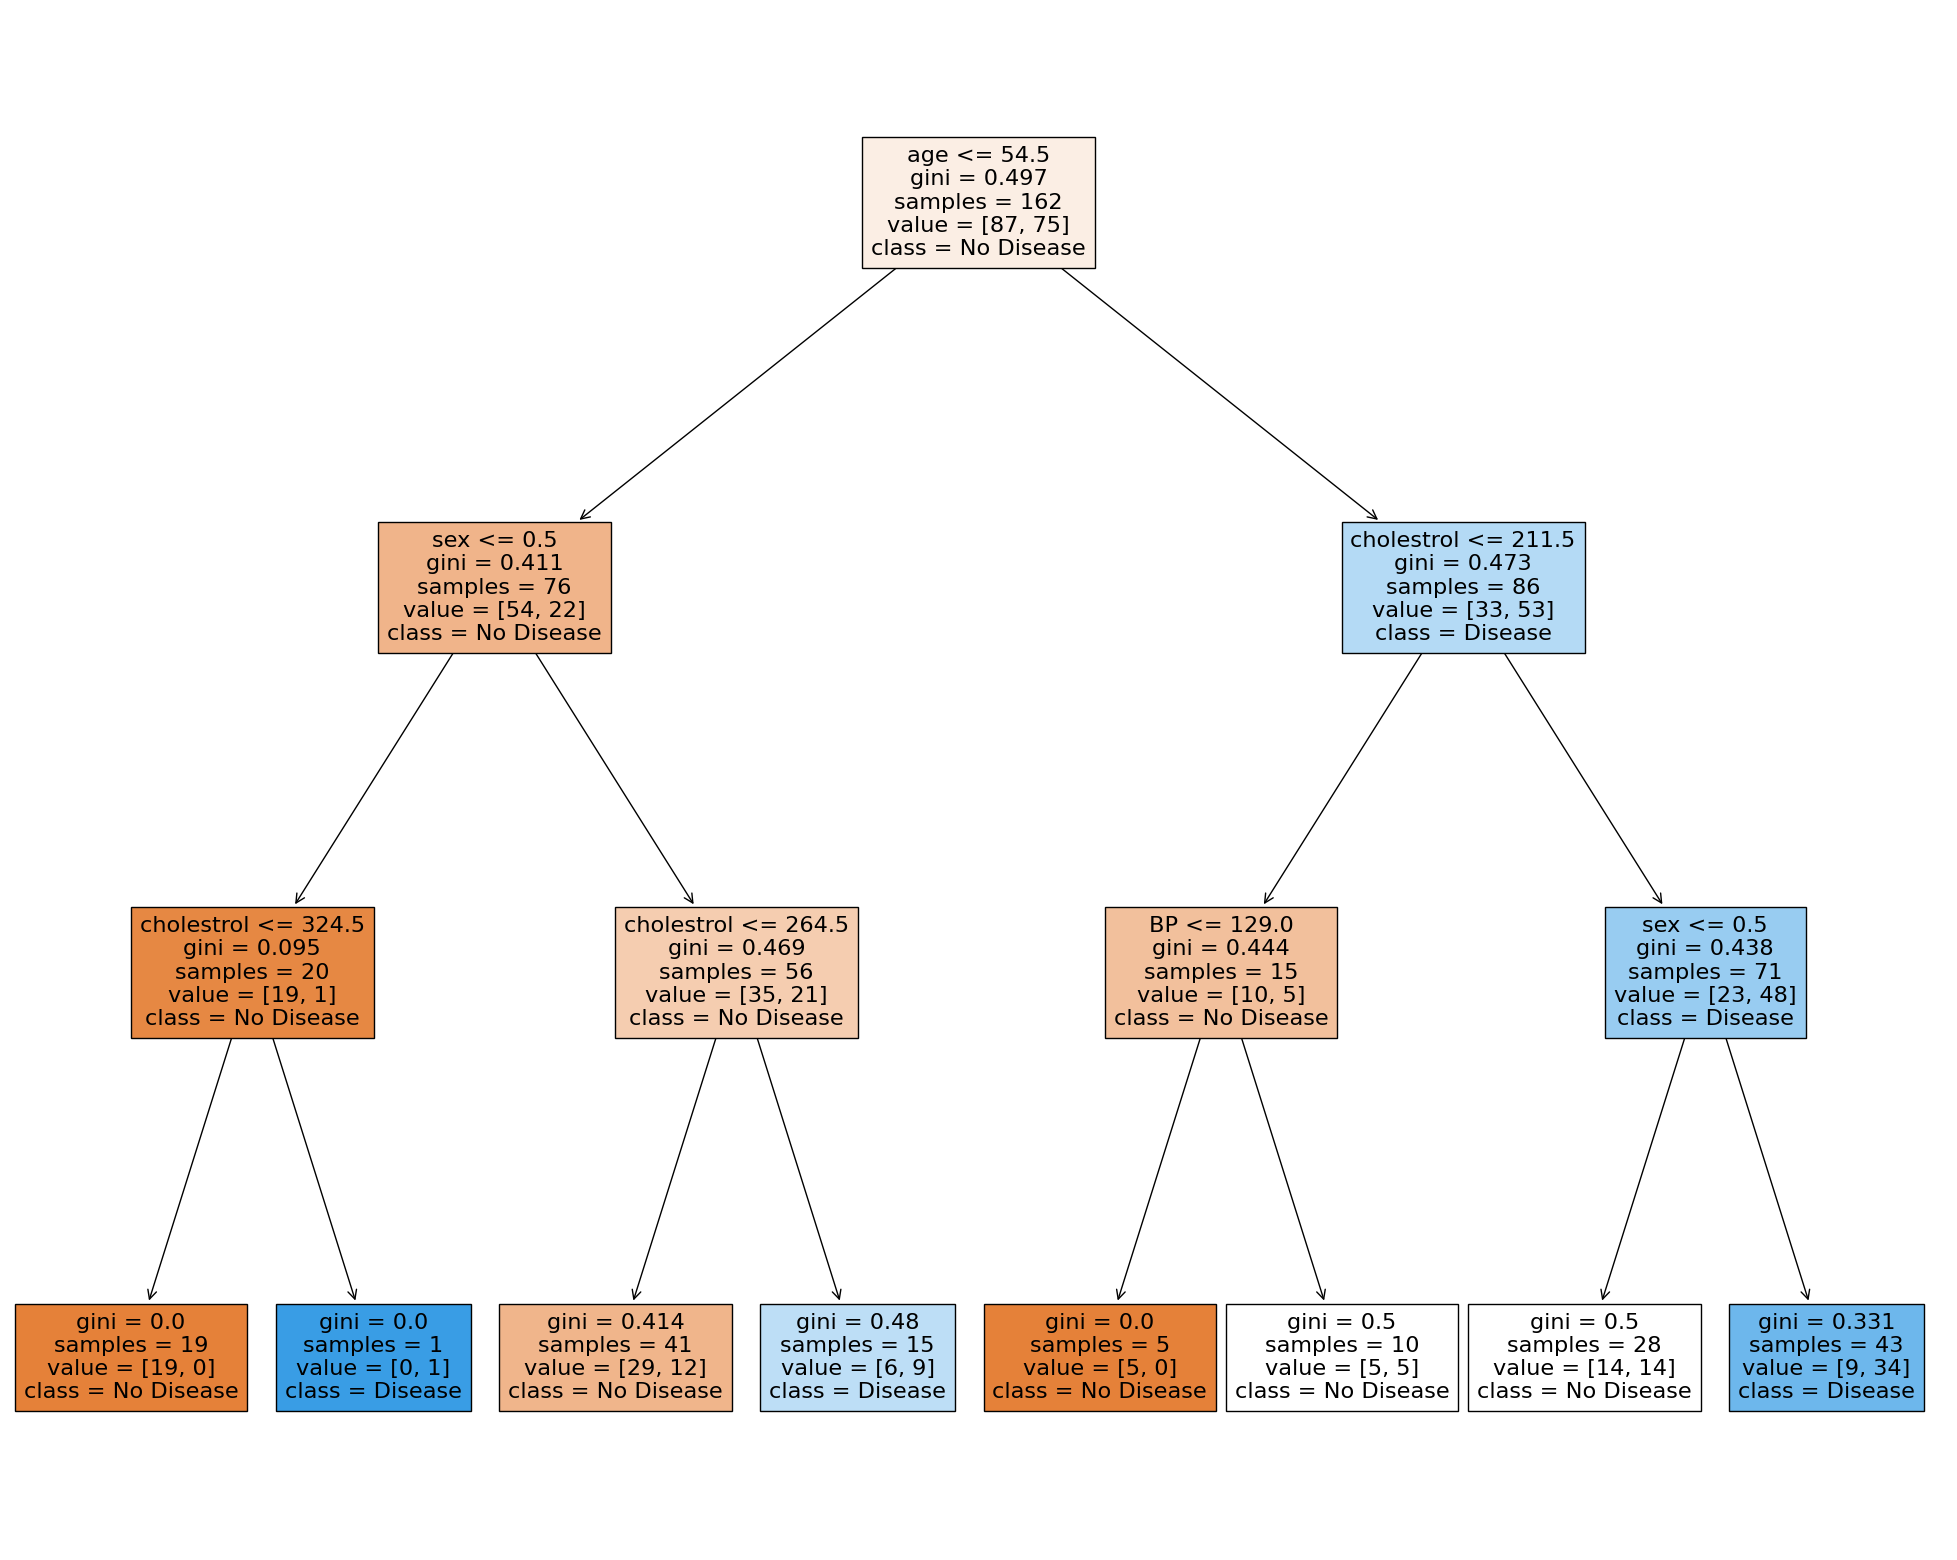

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No Disease', "Disease"],
                   filled=True)

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7160493827160493


array([[72, 15],
       [31, 44]])

In [ ]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7037037037037037


array([[51, 12],
       [20, 25]])

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

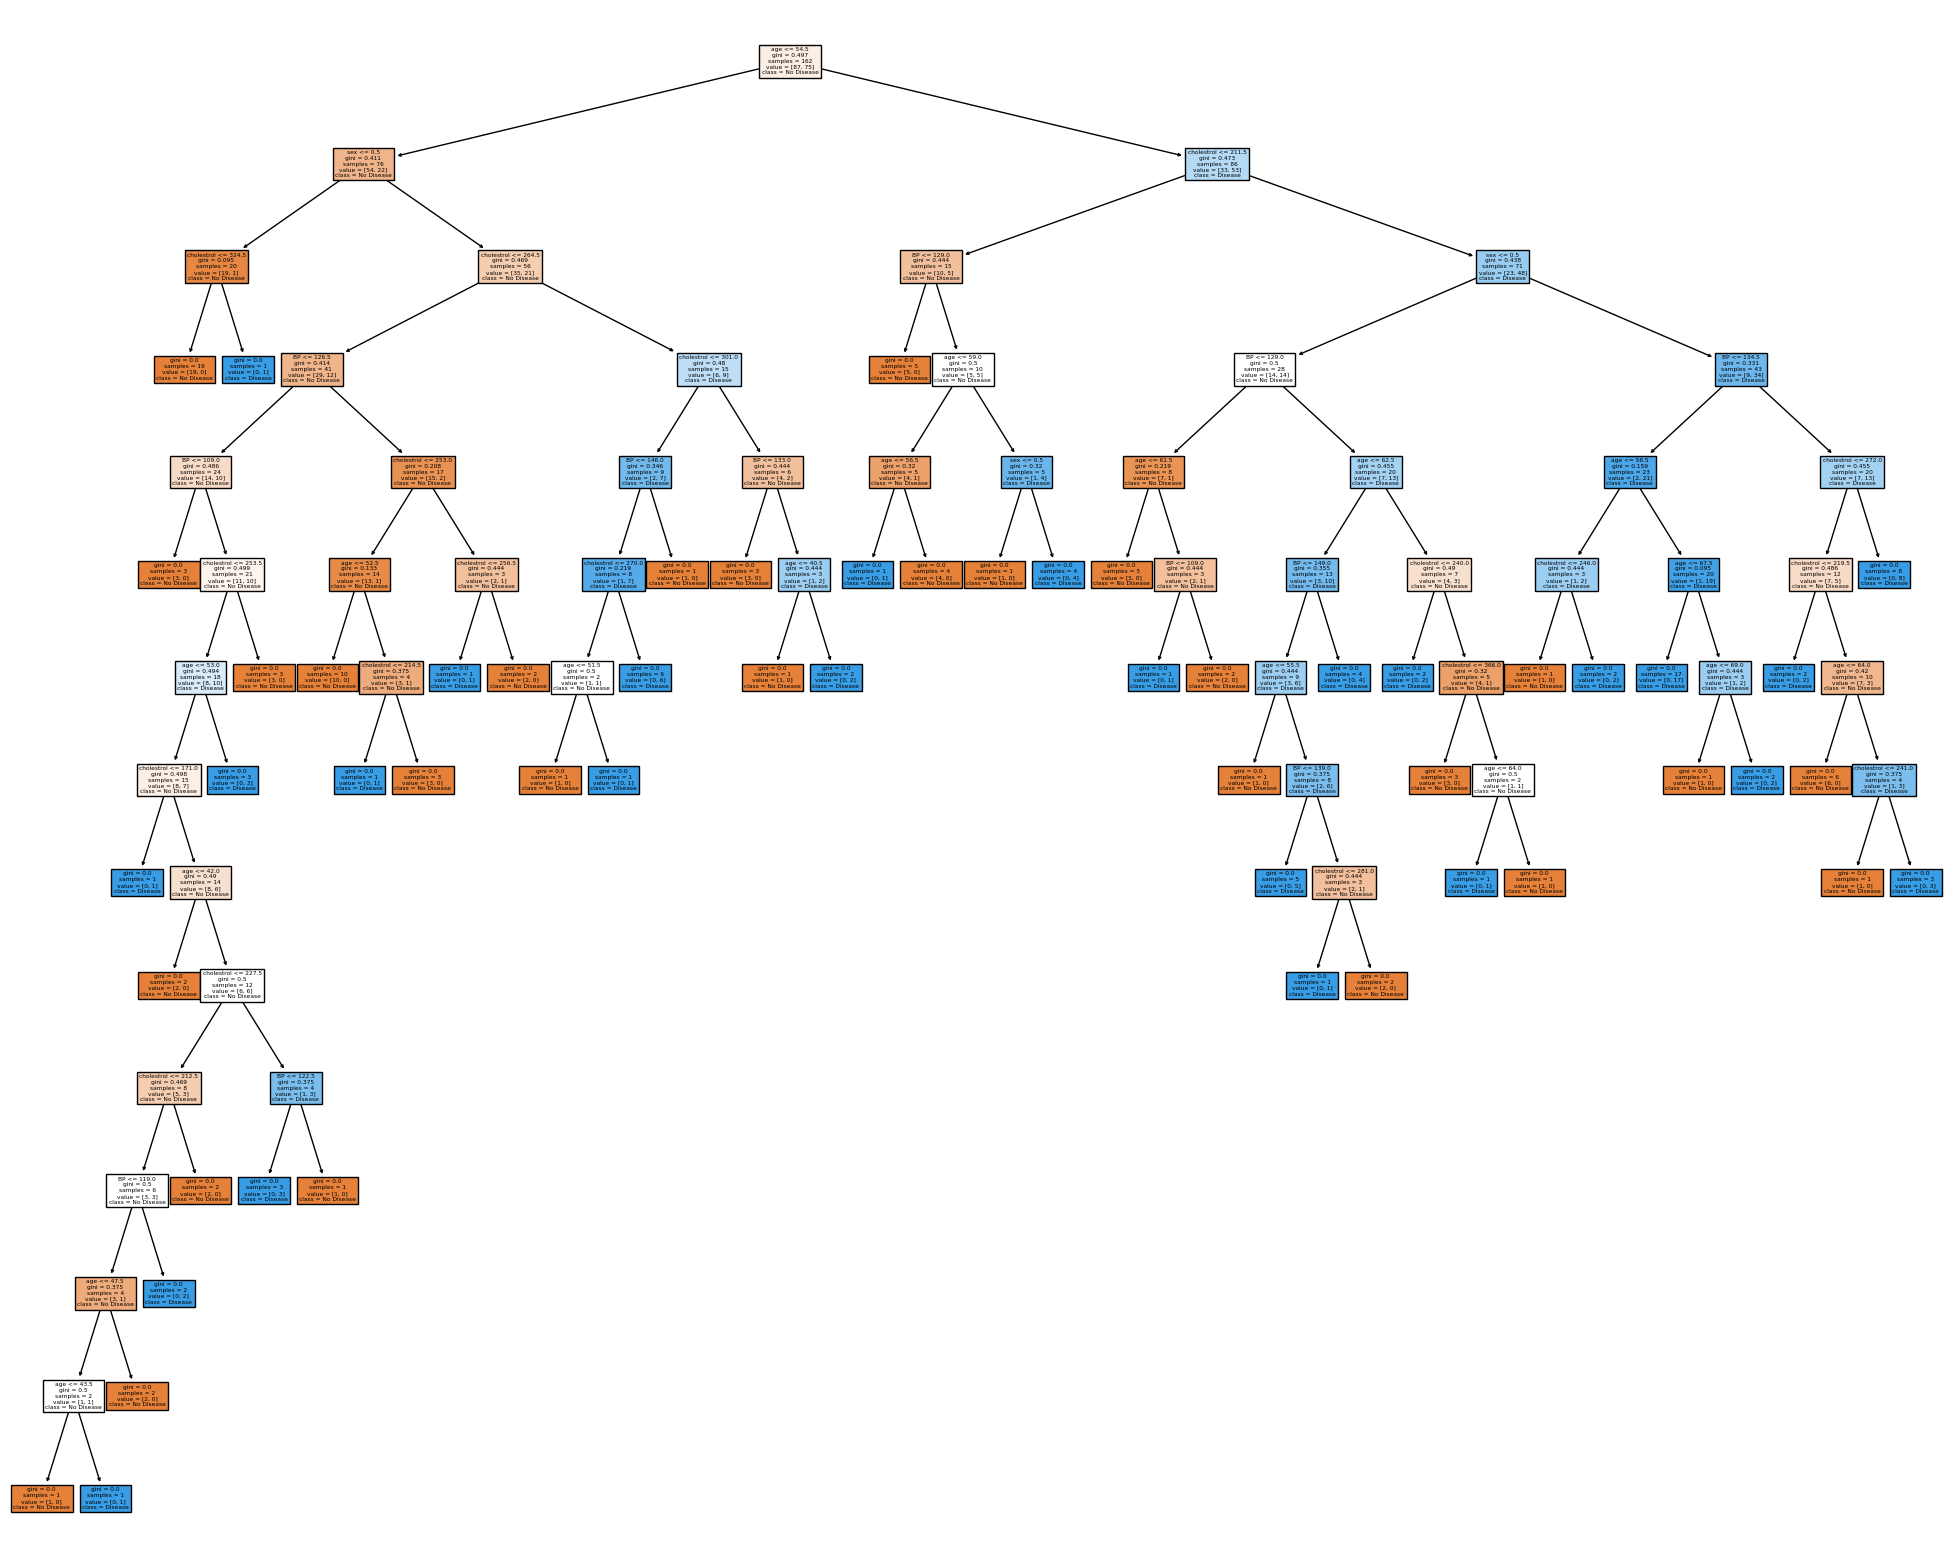

In [ ]:
gph = get_dt_graph(dt_default)

In [ ]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[87  0]
 [ 0 75]]
--------------------------------------------------
Test Accuracy : 0.7037037037037037
Test Confusion Matrix:
[[47 16]
 [16 29]]
